In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import missingno as msno
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from IPython.display import HTML
from colorama import Fore as f
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import re
import warnings
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#set seed for reproducibility
np.random.seed(0)

/kaggle/input/all-cars-in-india-price-and-specifications/All_cars_dataset.csv


In [2]:
car = pd.read_csv("/kaggle/input/all-cars-in-india-price-and-specifications/All_cars_dataset.csv")

In [3]:
car.head()

,Name,EMI,Price,Mileage,ENGINE,TRANSMISSION,FUEL TYPE,Price range,Length (mm),Wheelbase (mm),...,Fuel Capacity (L),Height (mm),Ground Clearance (mm),Colors,Seating Capacity,Displacement (cc),Peak Power,Peak Torque,Color Varients,Top_Speed
0,Porsche Macan,"1,18,950",69.98 Lakh,14 kmpl,1984 to 2995 cc,Automatic,Petrol,₹ 69.98 - 85.01 Lakh,4696,2807,...,75,1624,198,"Agate Grey, Black, Carmine Red, Carrara White...",5,1984,251 BHP@5000 RPM,370 NM @1600 RPM,24,254 Km/h
1,Porsche 718,"1,45,262",85.46 Lakh,9 kmpl,1988 to 3995 cc,"Automatic, Manual",Petrol,₹ 85.46 Lakh - 1.64 Crore,4379,2475,...,54,1281,128,"Agate Grey, Black, Carmine Red, Carrara White...",2,1988,295 BHP@6500 RPM,380 NM @1950 RPM,23,275km/h
2,Porsche Cayenne,"2,02,272",1.2 Crore,9 - 40 kmpl,2995 to 3996 cc,Automatic,Petrol,₹ 1.2 - 1.93 Crore,4918,2895,...,75,1696,210,"Biscay Blue, Black, Carrara White, Jet Black ...",5,2995,456 BHP@5250 RPM,700 NM,22,286 Km/h
3,Porsche Cayenne Coupe,"2,24,165",1.32 Crore,10.75 kmpl,2995 to 3996 cc,Automatic,Petrol,₹ 1.32 - 1.98 Crore,4931,2895,...,75,1676,190,"Biskay Blue , Carrara White, Crayon, Dolomite...",4,2995,335 BHP@5300 RPM,450 NM @1340 RPM,18,286 Km/h
4,Porsche Panamera,"2,45,599",1.44 Crore,8-37 kmpl,2894 to 4806 cc,Automatic,Petrol,₹ 1.44 - 2.43 Crore,5049,2950,...,75,1423,133,"Amethyst, Aventurine Green, Burgundy Red, Car...",4,2894,326 BHP@5400 RPM,450 NM @1750 RPM,28,310 Km/h


In [4]:
def remove_characters(tex):
    if tex==' - ':
        return -1
    elif '-' in tex :
        return float(tex.split('-')[0])
    else:
        return float(re.sub(r'[^0-9.]','',tex))

def price_changer(tex):
    if 'lakh' in tex.lower() :
        num=remove_characters(tex)
        num*=100000
    elif 'crore' in tex.lower():
        num=remove_characters(tex)
        num*=10000000
    return num


car=pd.read_csv("../input/all-cars-in-india-price-and-specifications/All_cars_dataset.csv")

car.drop('Top_Speed',axis=1,inplace=True)
car.dropna(inplace=True)

car['Company']=car['Name'].apply(lambda x : x.split(' ')[0])
car['EMI']=car['EMI'].apply(lambda x: int(x.replace(',','')))
car['Mileage']=car['Mileage'].apply(remove_characters)
car['Price']=car['Price'].apply(price_changer)

car['TRANSMISSION'].replace({'Automatic, Manual ':'Manual ','Manual, Automatic ':'Manual ',
                              'Manual, Semi - Automatic, Automatic ':'Manual ',
                             'Manual, Automatic, Semi - Automatic ':'Manual '},inplace=True)


car.head()

,Name,EMI,Price,Mileage,ENGINE,TRANSMISSION,FUEL TYPE,Price range,Length (mm),Wheelbase (mm),...,Fuel Capacity (L),Height (mm),Ground Clearance (mm),Colors,Seating Capacity,Displacement (cc),Peak Power,Peak Torque,Color Varients,Company
0,Porsche Macan,118950,6998000.0,14.00,1984 to 2995 cc,Automatic,Petrol,₹ 69.98 - 85.01 Lakh,4696,2807,...,75,1624,198,"Agate Grey, Black, Carmine Red, Carrara White...",5,1984,251 BHP@5000 RPM,370 NM @1600 RPM,24,Porsche
1,Porsche 718,145262,8546000.0,9.00,1988 to 3995 cc,Manual,Petrol,₹ 85.46 Lakh - 1.64 Crore,4379,2475,...,54,1281,128,"Agate Grey, Black, Carmine Red, Carrara White...",2,1988,295 BHP@6500 RPM,380 NM @1950 RPM,23,Porsche
2,Porsche Cayenne,202272,12000000.0,9.00,2995 to 3996 cc,Automatic,Petrol,₹ 1.2 - 1.93 Crore,4918,2895,...,75,1696,210,"Biscay Blue, Black, Carrara White, Jet Black ...",5,2995,456 BHP@5250 RPM,700 NM,22,Porsche
3,Porsche Cayenne Coupe,224165,13200000.0,10.75,2995 to 3996 cc,Automatic,Petrol,₹ 1.32 - 1.98 Crore,4931,2895,...,75,1676,190,"Biskay Blue , Carrara White, Crayon, Dolomite...",4,2995,335 BHP@5300 RPM,450 NM @1340 RPM,18,Porsche
4,Porsche Panamera,245599,14400000.0,8.00,2894 to 4806 cc,Automatic,Petrol,₹ 1.44 - 2.43 Crore,5049,2950,...,75,1423,133,"Amethyst, Aventurine Green, Burgundy Red, Car...",4,2894,326 BHP@5400 RPM,450 NM @1750 RPM,28,Porsche


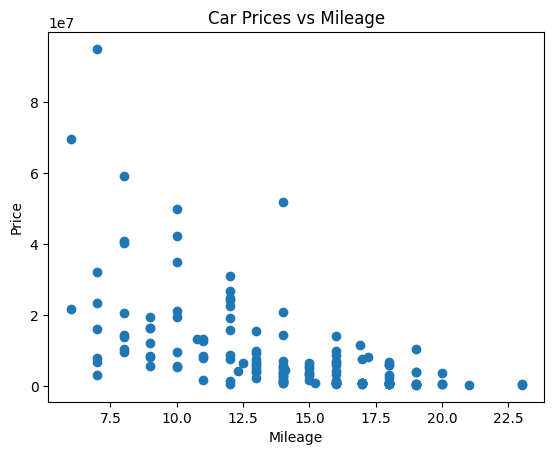

In [5]:
#Visualize the dataset.

plt.scatter(car['Mileage'], car['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Car Prices vs Mileage')
plt.show()

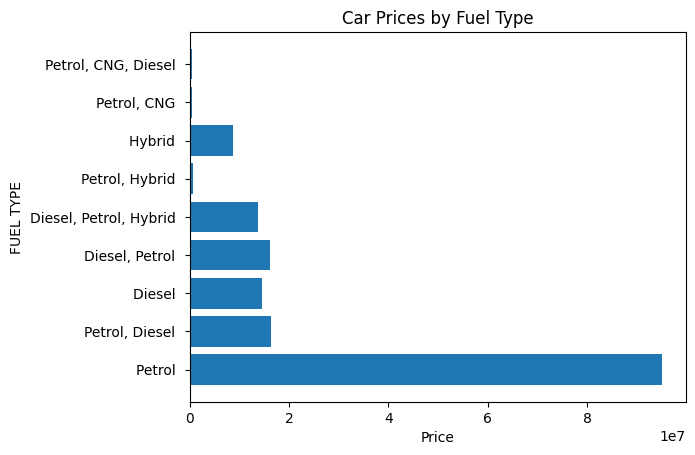

In [6]:
plt.barh(car['FUEL TYPE'], car['Price'])
plt.xlabel('Price')
plt.ylabel('FUEL TYPE')
plt.title('Car Prices by Fuel Type')
plt.show()